DBSCAN(Density-Based Spatial Clustering of Applications with Noise)은 밀도 기반의 클러스터링 알고리즘으로, 데이터의 밀도를 기반으로 클러스터를 식별합니다. 이 알고리즘은 클러스터 내의 데이터 포인트가 더 밀집되어 있고 클러스터들 간의 거리가 더 멀어지는 것을 전제로 합니다.

> 입실론 주변 영역의 최소 데이터 개수를 포함하는 밀도 기준을 충족시키는 data인 핵심 포인트를 연결하면서 군집화를 구성하는 방식이다. 따라서, 특정 공간 내에 데이터 밀도 차이를 기반 알고리즘으로 하고 있어서 복잡한 기하학적 분포도를 가진 데이터 세트에 대해서도 군집화를 잘 수행할 수 있다.

다음은 DBSCAN 알고리즘의 주요 단계와 개념입니다:

1. **입력 데이터 설정**: DBSCAN 알고리즘에는 데이터 포인트의 집합이 필요합니다. 각 데이터 포인트는 n차원 공간에서 특징 벡터로 표현됩니다.

2. **기본 파라미터 설정**: DBSCAN 알고리즘을 적용하기 위해 두 가지 주요 파라미터를 설정해야 합니다.
   - **eps(epsilon)** => 주변 영역 : 데이터 포인트 간의 최대 거리를 나타내는 임계값입니다. 이 거리보다 가까운 데이터 포인트들은 밀접한 이웃으로 간주됩니다.
   - **min_samples** => 최소 데이터 개수 : 한 데이터 포인트의 이웃으로 간주되기 위한 최소 데이터 포인트 수입니다. 이웃의 수가 이 값보다 적으면 해당 포인트는 노이즈로 처리됩니다.

3. **코어 포인트(Core Point) 식별**: 주어진 eps와 min_samples 파라미터를 사용하여 각 데이터 포인트에 대해 코어 포인트를 식별합니다. 코어 포인트는 주어진 반경 내에 최소한의 이웃을 가진 데이터 포인트입니다.

4. **이웃 포인트(Neighbor Point) 식별**: 코어 포인트의 이웃 포인트를 식별합니다. 이는 주어진 반경 내에 위치한 모든 데이터 포인트를 의미합니다.

5. **클러스터 할당**: 코어 포인트와 그 이웃 코어 포인트를 연결하여 클러스터를 형성합니다. 이웃 포인트가 다른 코어 포인트의 이웃이면 이 두 포인트는 동일한 클러스터에 속합니다. 이러한 방식으로 모든 포인트는 클러스터에 할당되거나 노이즈로 표시됩니다. (특정 핵심 포인트에서 직접 접근이 가능한 다른 핵심 포인트를 서로 연결하면서 군집화를 구성)

- 핵심포인트는 아니지만, 이웃 데이터로 핵심 포인트를 가지고 있는 data : 경계 포인트(border point)라고 하며, 경계 포인트는 군집의 외곽을 형성

6. **노이즈 포인트 처리**: 클러스터에 속하지 않는 데이터 포인트는 노이즈로 처리됩니다. 이는 코어 포인트 또는 이웃 포인트가 아닌 데이터 포인트를 의미합니다.(반경 내에 최소 data를 가지고 있지도 않고, 핵심 포인트 또한 이웃 data로 가지고 있지 않느 data를 잡음 포인트 Noise point라고 부른다)

DBSCAN 알고리즘은 데이터의 분포가 밀도 기반으로 클러스터를 형성할 때 특히 유용합니다. 또한 **클러스터의 모양과 크기에 대한 가정이 필요하지 않으며, 노이즈를 처리하는 강력한 메커니즘을 제공**합니다.

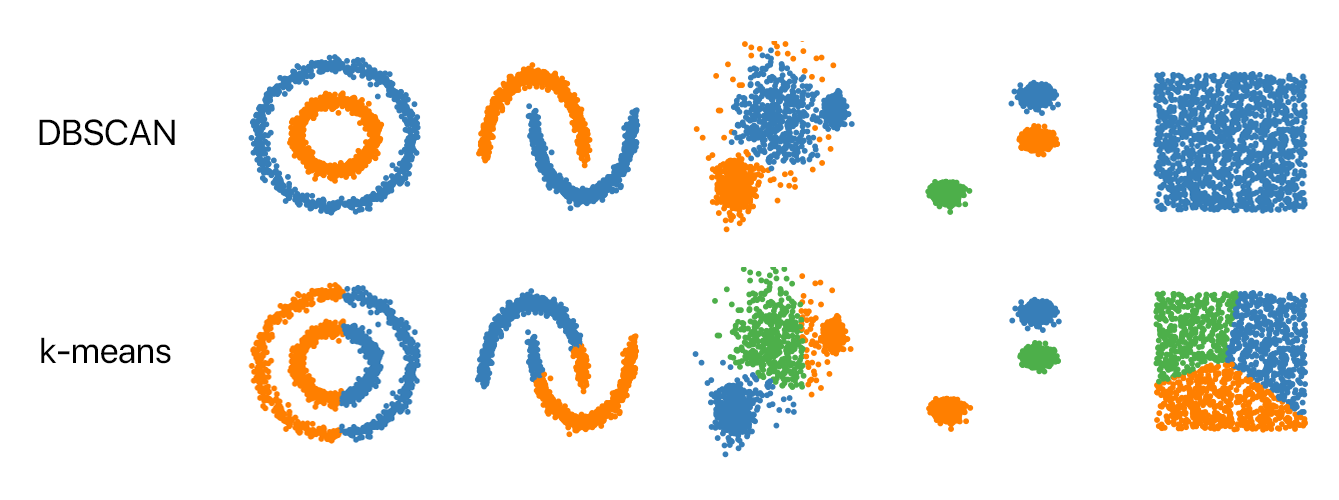

In [6]:
# DBSCAN 적용하기
from sklearn.datasets import load_iris

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

iris = load_iris()
feature_names = ['sepal_length','sepal_width','petal_length','petal_width']

# 보다 편리한 데이타 Handling을 위해 DataFrame으로 변환
irisDF = pd.DataFrame(data=iris.data, columns=feature_names)

In [7]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps = 0.6, min_samples = 8, metric = 'euclidean')
dbscan_labels = dbscan.fit_predict(iris.data)

irisDF['dbscan_cluster'] = dbscan_labels
irisDF['target'] = iris.target

iris_result = irisDF.groupby(['target'])['dbscan_cluster'].value_counts()
print(iris_result)

target  dbscan_cluster
0        0                49
        -1                 1
1        1                46
        -1                 4
2        1                42
        -1                 8
Name: dbscan_cluster, dtype: int64


> Target 값의 유형이 3가지인데, 군집이 2개가 됐다고 군집화 효율이 떨어진다는 의미는 아니다. DBSCAN은 군집의 개수를 알고리즘에 따라 자동으로 지정하므로 DBSCAN에서 군집의 개수를 지정하는 것은 무의미하다고 할 수 있습니다.

- 다른 클러스터링 알고리즘은 일반적으로 군집의 개수를 사전에 설정해야 합니다. 이는 명시적으로 지정해야 할 매개변수로, 종종 사용자의 주관이나 경험에 따라 조정됩니다. 그러나 DBSCAN은 데이터의 밀도를 기반으로 군집을 형성하며, 이를 통해 군집의 개수를 자동으로 결정합니다. 이러한 특성은 DBSCAN이 군집의 개수를 예측하는 데 더 유연하게 대처할 수 있도록 해줍니다. 그래서 군집의 개수가 목표 값과 다를지라도, DBSCAN은 데이터의 밀도에 따라 군집을 형성하므로 여전히 효과적으로 군집화를 수행할 수 있습니다. 따라서 군집의 개수가 목표 값과 다르더라도 DBSCAN이 효과적인 군집화를 수행하는 것으로 간주됩니다.

In [8]:
## 클러스터 결과를 담은 DataFrame과 사이킷런의 Cluster 객체등을 인자로 받아 클러스터링 결과를 시각화하는 함수 ##
def visualize_cluster_plot(clusterobj, dataframe, label_name, iscenter=True):
    if iscenter :
        centers = clusterobj.cluster_centers_

    unique_labels = np.unique(dataframe[label_name].values)
    markers=['o', 's', '^', 'x', '*']
    isNoise=False

    for label in unique_labels:
        label_cluster = dataframe[dataframe[label_name]==label]
        if label == -1:
            cluster_legend = 'Noise'
            isNoise=True
        else :
            cluster_legend = 'Cluster '+str(label)

        plt.scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2'], s=70,\
                    edgecolor='k', marker=markers[label], label=cluster_legend)

        if iscenter:
            center_x_y = centers[label]
            plt.scatter(x=center_x_y[0], y=center_x_y[1], s=250, color='white',
                        alpha=0.9, edgecolor='k', marker=markers[label])
            plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k',\
                        edgecolor='k', marker='$%d$' % label)
    if isNoise:
        legend_loc='upper center'
    else: legend_loc='upper right'

    plt.legend(loc=legend_loc)
    plt.show()

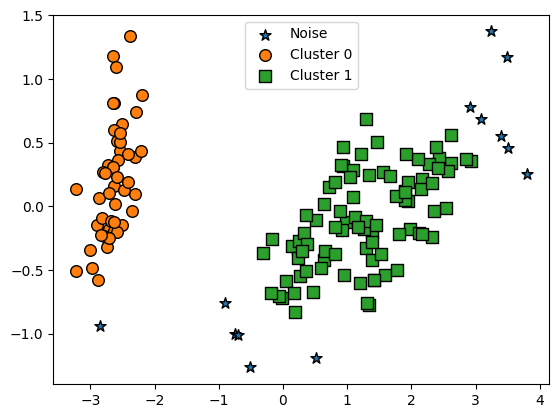

In [9]:
from sklearn.decomposition import PCA
# 2차원으로 시각화하기 위해 PCA n_componets=2로 피처 데이터 세트 변환
pca = PCA(n_components = 2, random_state = 0)
pca_transformed = pca.fit_transform(iris.data)
# visualize_cluster_2d( ) 함수는 ftr1, ftr2 컬럼을 좌표에 표현하므로 PCA 변환값을 해당 컬럼으로 생성
irisDF['ftr1'] = pca_transformed[:, 0]
irisDF['ftr2'] = pca_transformed[:,1]

visualize_cluster_plot(dbscan, irisDF, 'dbscan_cluster', iscenter = False)

In [10]:
# eps : 0.6 => 0.8
dbscan = DBSCAN(eps = 0.8, min_samples = 8, metric = 'euclidean')
dbscan_labels = dbscan.fit_predict(iris.data)

irisDF['dbscan_cluster'] = dbscan_labels
irisDF['target'] = iris.target

iris_result = irisDF.groupby(['target'])['dbscan_cluster'].value_counts()
print(iris_result)

target  dbscan_cluster
0        0                50
1        1                50
2        1                47
        -1                 3
Name: dbscan_cluster, dtype: int64


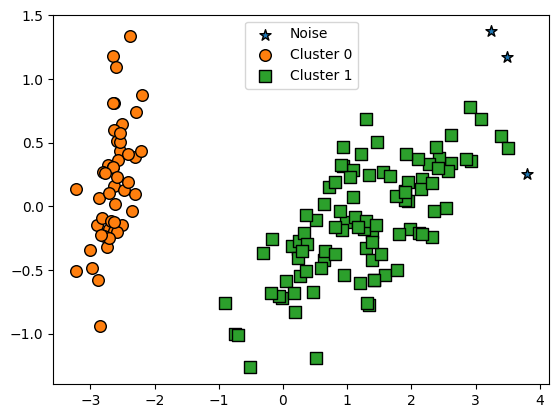

In [12]:
visualize_cluster_plot(dbscan, irisDF, 'dbscan_cluster', iscenter=False)

target  dbscan_cluster
0        0                48
        -1                 2
1        1                44
        -1                 6
2        1                36
        -1                14
Name: dbscan_cluster, dtype: int64


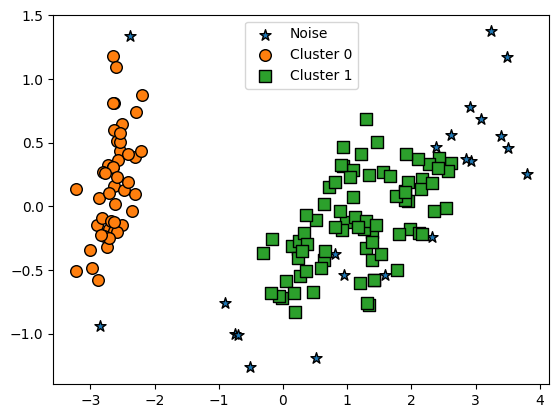

In [14]:
# eps 값은 유지, min_samples 수를 16으로 증가
dbscan = DBSCAN(eps=0.6, min_samples=16, metric='euclidean')
dbscan_labels = dbscan.fit_predict(iris.data)

irisDF['dbscan_cluster'] = dbscan_labels
irisDF['target'] = iris.target

iris_result = irisDF.groupby(['target'])['dbscan_cluster'].value_counts()
print(iris_result)

visualize_cluster_plot(dbscan, irisDF, 'dbscan_cluster', iscenter=False)

## Noise가 많이 생김을 알 수 있다 ##

> **DBSCAN 적용하기 – make_circles() 데이터 세트**

- 복잡한 기하학적 분포를 가지는 data set을 통해 dbscan과 다른 클러스터링 알고리즘 비교

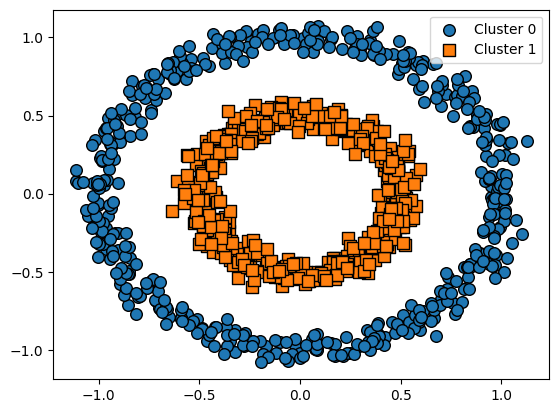

In [15]:
from sklearn.datasets import make_circles

X,y = make_circles(n_samples = 1000, shuffle = True, noise = 0.05, random_state = 0, factor = 0.5)
clusterDF = pd.DataFrame(data = X, columns = ['ftr1', 'ftr2'])
clusterDF['target'] = y

visualize_cluster_plot(None, clusterDF, 'target', iscenter=False)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


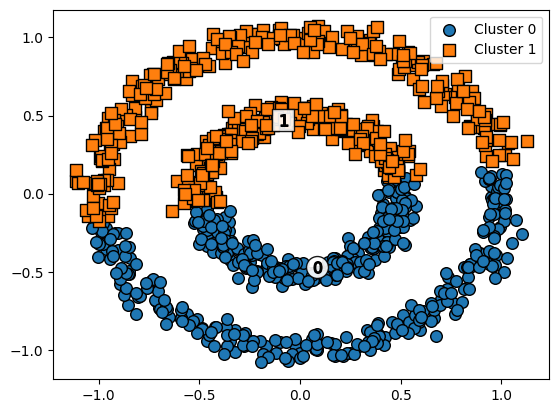

In [16]:
# KMeans로 make_circles( ) 데이터 셋을 클러스터링 수행.
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters = 2, max_iter = 1000, random_state = 0)
kmeans_labels = kmeans.fit_predict(X)
clusterDF['kmeans_cluster'] = kmeans_labels

visualize_cluster_plot(kmeans, clusterDF, 'kmeans_cluster', iscenter=True)

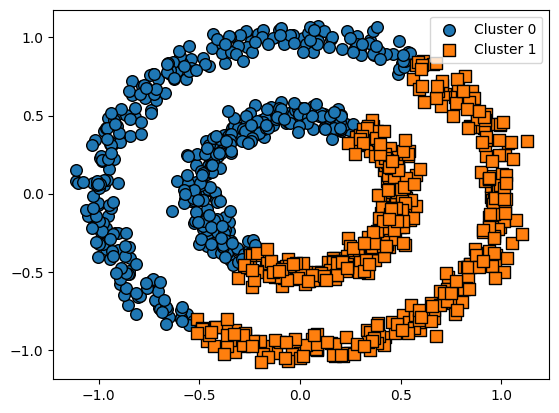

In [18]:
# GMM으로 make_circles( ) 데이터 셋을 클러스터링 수행.
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=2, random_state=0)
gmm_label = gmm.fit(X).predict(X)
clusterDF['gmm_cluster'] = gmm_label

visualize_cluster_plot(gmm, clusterDF, 'gmm_cluster', iscenter=False)

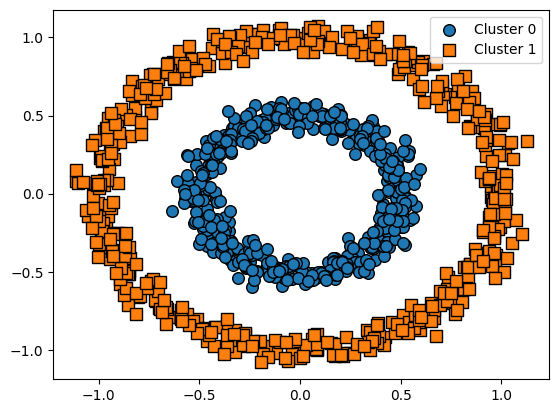

In [19]:
# DBSCAN으로 make_circles( ) 데이터 셋을 클러스터링 수행.

from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.2, min_samples=10, metric='euclidean')
dbscan_labels = dbscan.fit_predict(X)
clusterDF['dbscan_cluster'] = dbscan_labels

visualize_cluster_plot(dbscan, clusterDF, 'dbscan_cluster', iscenter=False)

> - 데이터 분석에서는 종종 데이터의 구조를 사전에 알 수 없습니다. 이런 경우에는 일반적으로 몇 가지 후보 클러스터링 알고리즘을 사용하여 데이터를 탐색하고, 각 알고리즘의 결과를 비교하여 최적의 클러스터링 기법을 선택합니다. 이를 위해 다음과 같은 접근 방법을 사용할 수 있습니다:
1. 탐색적 데이터 분석(EDA; Exploratory Data Analysis): 데이터를 시각화하고 기초 통계를 분석하여 데이터의 구조를 이해합니다. 이를 통해 데이터의 특성과 패턴을 파악할 수 있습니다.
2. 다양한 클러스터링 알고리즘 적용: 몇 가지 다른 클러스터링 알고리즘을 선택하여 데이터에 적용합니다. K-means, DBSCAN, Hierarchical Clustering 등의 알고리즘이 후보가 될 수 있습니다.
3. 성능 평가: 각 알고리즘의 결과를 평가하고 비교합니다. 이는 내부 평가 지표(예: 실루엣 점수)나 외부 평가 지표(예: 실제 레이블과의 비교)를 사용하여 수행될 수 있습니다.
4. 최적의 알고리즘 선택: 성능 평가를 통해 최적의 클러스터링 알고리즘을 선택합니다. 이때는 알고리즘의 각각의 장단점과 데이터에 맞는 적합성을 고려합니다.

- 따라서 데이터의 구조를 미리 파악하지 못할 때에는 여러 클러스터링 알고리즘을 시도하고 비교하여 최적의 알고리즘을 선택하는 접근 방법이 일반적으로 사용됩니다.